In [11]:
import torchvision
from torch import nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots
import utils

In [12]:
class TransferModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10) 
        
        
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers
            
    def forward(self, x):
        x = self.model(x)
        
        return x

In [13]:
epochs = 5
batch_size = 32
learning_rate = 5e-4
early_stop_count = 3
dataloaders = load_cifar10(batch_size, resnet=True, augment=True)
model = TransferModel()

print(f"Using device: {utils.get_device()}")
dataloader_types = ["train", "val", "test"]

for i, data in enumerate(dataloaders):
    print(f"{dataloader_types[i]} size: {len(data)}")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using device: cuda
train size: 2812
val size: 157
test size: 313


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders,
    Adam=True
)
trainer.train()

TransferModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

Epoch: 0, Batches per seconds: 102.53, Global step:   1406, Validation Loss: 0.33, Validation Accuracy: 89.160
Epoch: 0, Batches per seconds: 79.18, Global step:   2812, Validation Loss: 0.24, Validation Accuracy: 91.620
Epoch: 1, Batches per seconds: 74.32, Global step:   4218, Validation Loss: 0.22, Validation Accuracy: 93.000
Epoch: 1, Batches per seconds: 71.74, Global step:   5624, Validation Loss: 0.20, Validation Accuracy: 93.340
Epoch: 2, Batches per seconds: 70.37, Global step:   7030, Validation Loss: 0.21, Validation Accuracy: 93.580
Epoch: 2, Batches per seconds: 71.45, Global step:   8436, Validation Loss: 0.18, Validation Accuracy: 94.640
Epoch: 3, Batches per seconds: 70.49, Global step:   9842, Validation Loss: 0.17, Validation Accuracy: 94.680
Epoch: 3, Batches per seconds: 69.82, Global step:  11248, Validation Loss: 0.17, Validation Accuracy: 95.180
Epoch: 4, Batches per seconds: 69.40, Global step:  12654, Validation Loss: 0.19, Validation Accuracy: 94.660
Epoch: 4,

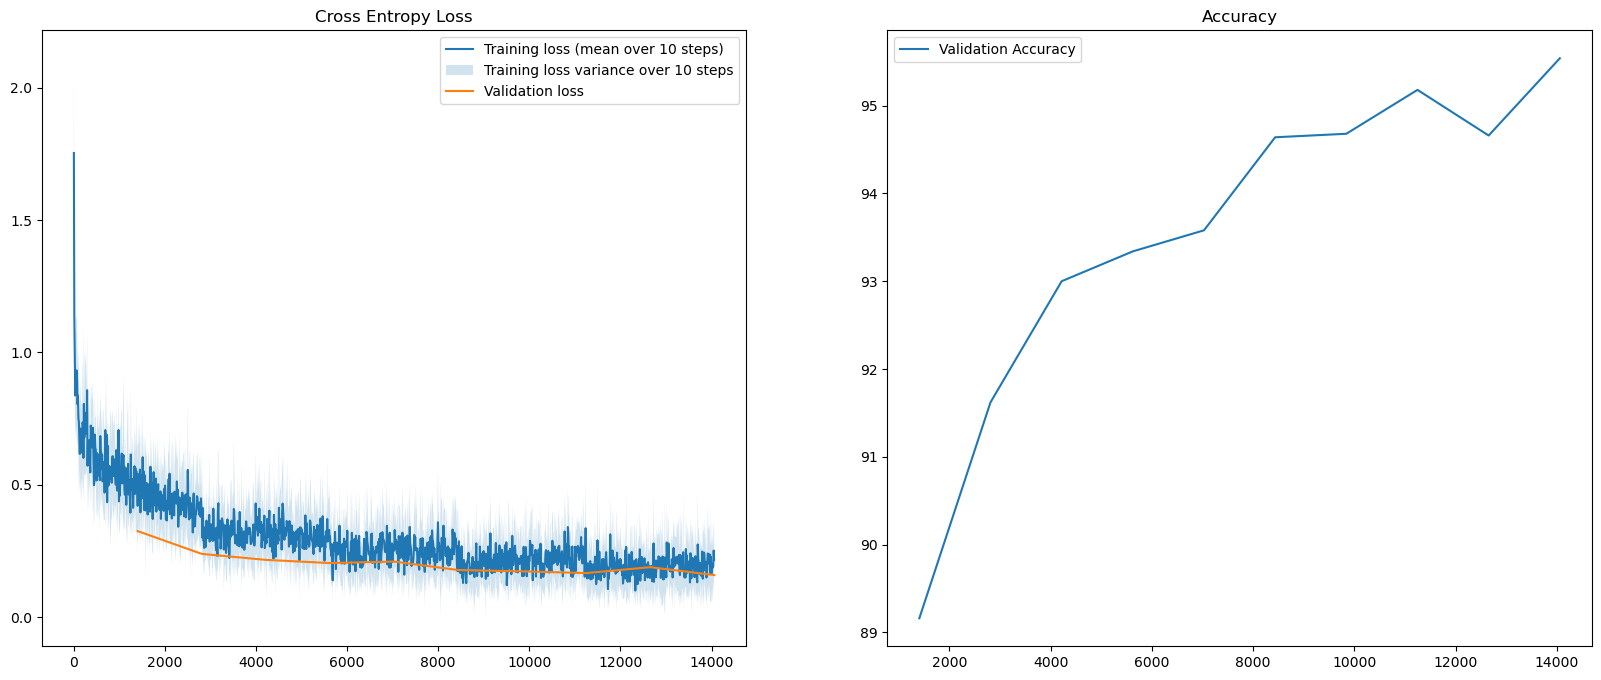

In [15]:
create_plots(trainer, "task4")

In [16]:
trainer.load_best_model()
train, val, test = dataloaders

In [17]:
_, train_accuracy = compute_loss_and_accuracy(train, trainer.model, nn.CrossEntropyLoss())
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 93.75


In [18]:
_, val_accuracy = compute_loss_and_accuracy(val, trainer.model, nn.CrossEntropyLoss())
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 94.54


In [19]:
_, test_accuracy = compute_loss_and_accuracy(test, trainer.model, nn.CrossEntropyLoss())
print(f"Testing Accuracy: {test_accuracy}")

Testing Accuracy: 89.98
